<a href="https://colab.research.google.com/github/cybersid123/AI-ML/blob/main/Computer_Vision_Implimentation_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cat vs Dog Classifier
##Loading our images


In [ ]:
from os import listdir
from os.path import isfile, join

mypath = '/content/drive/MyDrive/Colab Notebooks/catsvsdogs/images/'

file_names = [f for f in listdir(mypath) if isfile(join(mypath,f))]
print(len(file_names))

3112


# New Section

#Split the dataset

In [ ]:
import cv2
import numpy as np
import sys
import os
import shutil

# Extract 1000 for our training data and 500 for our validation set
# Takes about ~20 seconds to run
dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
dog_dir_train = "./datasets/catsvsdogs/train/dogs/"
cat_dir_train = "./datasets/catsvsdogs/train/cats/"
dog_dir_val = "./datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "./datasets/catsvsdogs/validation/cats/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names):

    if file_names[i][0] == "d":
        dog_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if dog_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image)
        if dog_count > training_size and dog_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)

    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image)

    if dog_count == training_size+test_size and cat_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


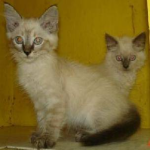

1 - Cat


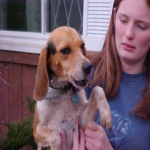

2 - DOg


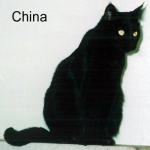

3 - Cat


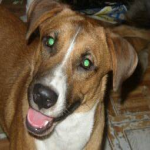

4 - DOg


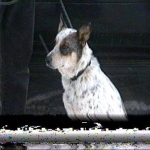

5 - DOg


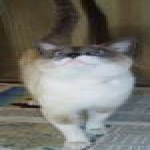

6 - Cat


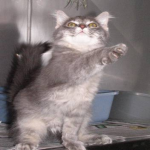

7 - Cat


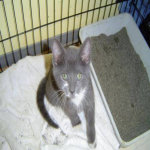

8 - Cat


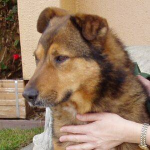

9 - DOg


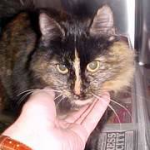

10 - Cat


In [ ]:
import cv2
import numpy as np
import sys
import os
import shutil

from google.colab.patches import cv2_imshow
for i in range(1,11):
  random = np.random.randint(0,len(training_images))
  cv2_imshow(training_images[random])
  if training_labels[random] == 0:
    print(str(i)+ " - Cat")
  else:
    print(str(i) + " - DOg")


In [ ]:
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))

#Lets get our data ready in the format that tensorflow(keras) is expecting

In [ ]:
import numpy as np


def load_data_training_and_test(datasetname):

    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']

    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']

    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']

    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train = x_train/255
x_test /= 255


In [ ]:
x_train.shape

(2000, 150, 150, 3)

In [ ]:
y_train.shape

(2000, 1)

In [ ]:
x_train[0].shape[0]

150

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

batch_size = 16
epochs = 10

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy']
              )

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

#Train Our Model

In [ ]:
history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test, y_test)
          )

model.save("cats_vs_dogs_v1.h5")

scores = model.evaluate(x_test, y_test, verbose =1)
print('Test loss', scores[0])
print('Test accuracy', scores[1])

Epoch 1/10
125/125 [==============================] - 14s 20ms/step - loss: 0.7112 - accuracy: 0.5190 - val_loss: 0.6681 - val_accuracy: 0.5480
Epoch 2/10
125/125 [==============================] - 1s 12ms/step - loss: 0.6749 - accuracy: 0.5945 - val_loss: 0.6142 - val_accuracy: 0.6570
Epoch 3/10
125/125 [==============================] - 2s 15ms/step - loss: 0.6352 - accuracy: 0.6445 - val_loss: 0.5766 - val_accuracy: 0.7020
Epoch 4/10
125/125 [==============================] - 2s 14ms/step - loss: 0.5900 - accuracy: 0.7055 - val_loss: 0.5813 - val_accuracy: 0.6980
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.5449 - accuracy: 0.7390 - val_loss: 0.5655 - val_accuracy: 0.7050
Epoch 6/10
125/125 [==============================] - 1s 12ms/step - loss: 0.4986 - accuracy: 0.7520 - val_loss: 0.6449 - val_accuracy: 0.6750
Epoch 7/10
125/125 [==============================] - 2s 12ms/step - loss: 0.4626 - accuracy: 0.7855 - val_loss: 0.5562 - val_accuracy: 0.731

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 1s 8ms/step - loss: 0.5999 - accuracy: 0.7180
Test loss 0.5999096632003784
Test accuracy 0.7179999947547913


#Test Our Classifier